<a href="https://colab.research.google.com/github/alidarvishh2492/HW_04/blob/main/HW_04_Darvish02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
print(df)

                dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...      

In [131]:
print(df.isna().sum())

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64


In [132]:
df = df.dropna(subset=['Country', 'dt'])
df = df.sort_values(['Country', 'dt'])

In [133]:
df['AverageTemperature'] = df.groupby('Country')['AverageTemperature'].transform(lambda x: x.fillna(x.rolling(window=60, center=True, min_periods=1).mean()))
df['AverageTemperatureUncertainty'] = df.groupby('Country')['AverageTemperatureUncertainty'].transform(lambda x: x.fillna(x.rolling(window=60, center=True, min_periods=1).mean()))
if df['AverageTemperature'].isna().sum() > 0:
    global_mean = df['AverageTemperature'].mean()
    df['AverageTemperature'] = df['AverageTemperature'].fillna(global_mean)
if df['AverageTemperatureUncertainty'].isna().sum() > 0:
    global_mean = df['AverageTemperatureUncertainty'].mean()
    df['AverageTemperatureUncertainty'] = df['AverageTemperatureUncertainty'].fillna(global_mean)

In [134]:
print(df.isna().sum())

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64


In [135]:
df['dt'] = pd.to_datetime(df['dt'])
df['Decade'] = (df['dt'].dt.year // 10 * 10).astype(str) + 's'

In [136]:
counts = df.groupby('Country')['dt'].nunique()
keep = counts[counts >= 100].index
df_new = df[df['Country'].isin(keep)]

In [137]:
decade_country = df_new.groupby(["Decade", "Country"])["AverageTemperatureUncertainty"].mean().reset_index()
matrix = decade_country.pivot(index="Decade", columns="Country", values="AverageTemperatureUncertainty")

In [139]:
global_annual = df.groupby("dt")["AverageTemperature"].mean().reset_index()
years = global_annual['dt'].dt.year.values
temps = global_annual['AverageTemperature'].values
coeffs = np.polyfit(years, temps, 1)
trend_line = np.polyval(coeffs, years)
warming_rate = coeffs[0] * 10
print(f"Global warming rate: {warming_rate} °C")

Global warming rate: 0.47645817600060375 °C


In [151]:
last_year = years[-1]
last_temp = temps[-1]
years_future = np.arange(last_year, 2051)

Optimistic= (0.7 * coeffs,)
Baseline= (coeffs,)
Pessimistic= (1.5 * coeffs,)

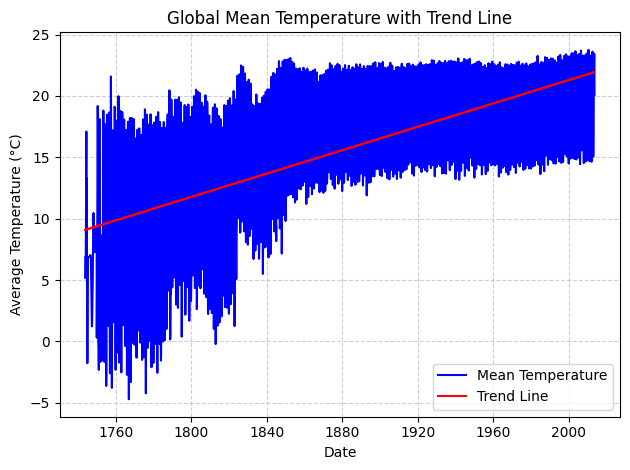

In [142]:
plt.plot(global_annual['dt'], global_annual['AverageTemperature'], label='Mean Temperature', color='blue')
plt.plot(global_annual['dt'], trend_line, label='Trend Line', color='red')
plt.title('Global Mean Temperature with Trend Line')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

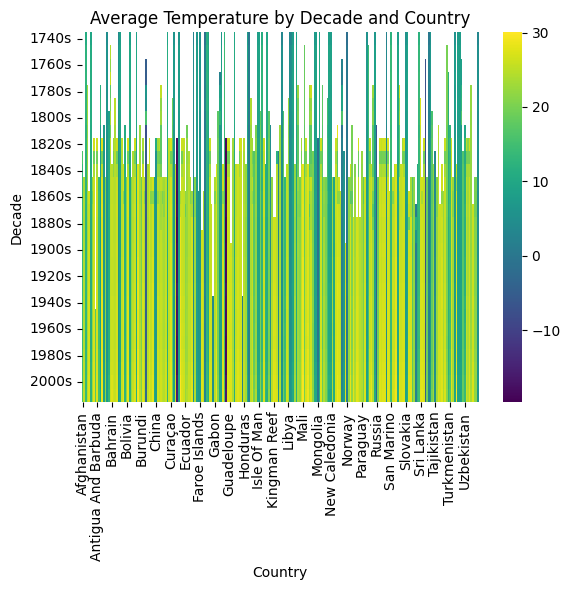

In [145]:
decade_country_temp = df_new.groupby(["Decade", "Country"])["AverageTemperature"].mean().reset_index()
heatmap_data = decade_country_temp.pivot(index="Decade", columns="Country", values="AverageTemperature")
sns.heatmap(heatmap_data, annot=False, cmap='viridis', fmt=".1f")
plt.title('Average Temperature by Decade and Country')
plt.xlabel('Country')
plt.ylabel('Decade')
plt.show()

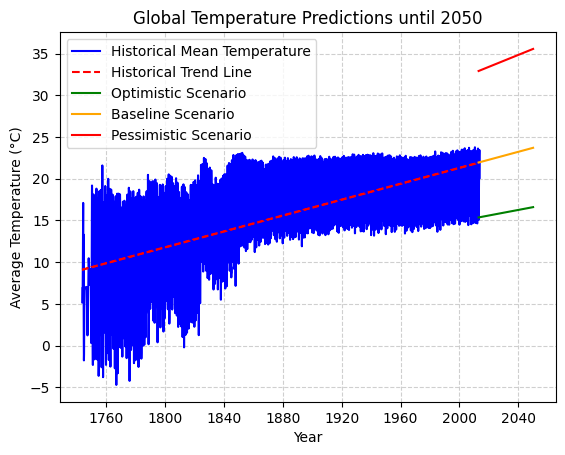

In [153]:
plt.plot(global_annual['dt'], global_annual['AverageTemperature'], label='Historical Mean Temperature', color='blue')
plt.plot(global_annual['dt'], trend_line, label='Historical Trend Line', color='red', linestyle='--')

future_years_dt = pd.to_datetime([f'{y}-01-01' for y in years_future])
baseline_future_temps = np.polyval(Baseline[0], years_future)
optimistic_future_temps = np.polyval(Optimistic[0], years_future)
pessimistic_future_temps = np.polyval(Pessimistic[0], years_future)

plt.plot(future_years_dt, optimistic_future_temps, label='Optimistic Scenario', color='green', linestyle='-')
plt.plot(future_years_dt, baseline_future_temps, label='Baseline Scenario', color='orange', linestyle='-')
plt.plot(future_years_dt, pessimistic_future_temps, label='Pessimistic Scenario', color='red', linestyle='-')

plt.title('Global Temperature Predictions until 2050')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

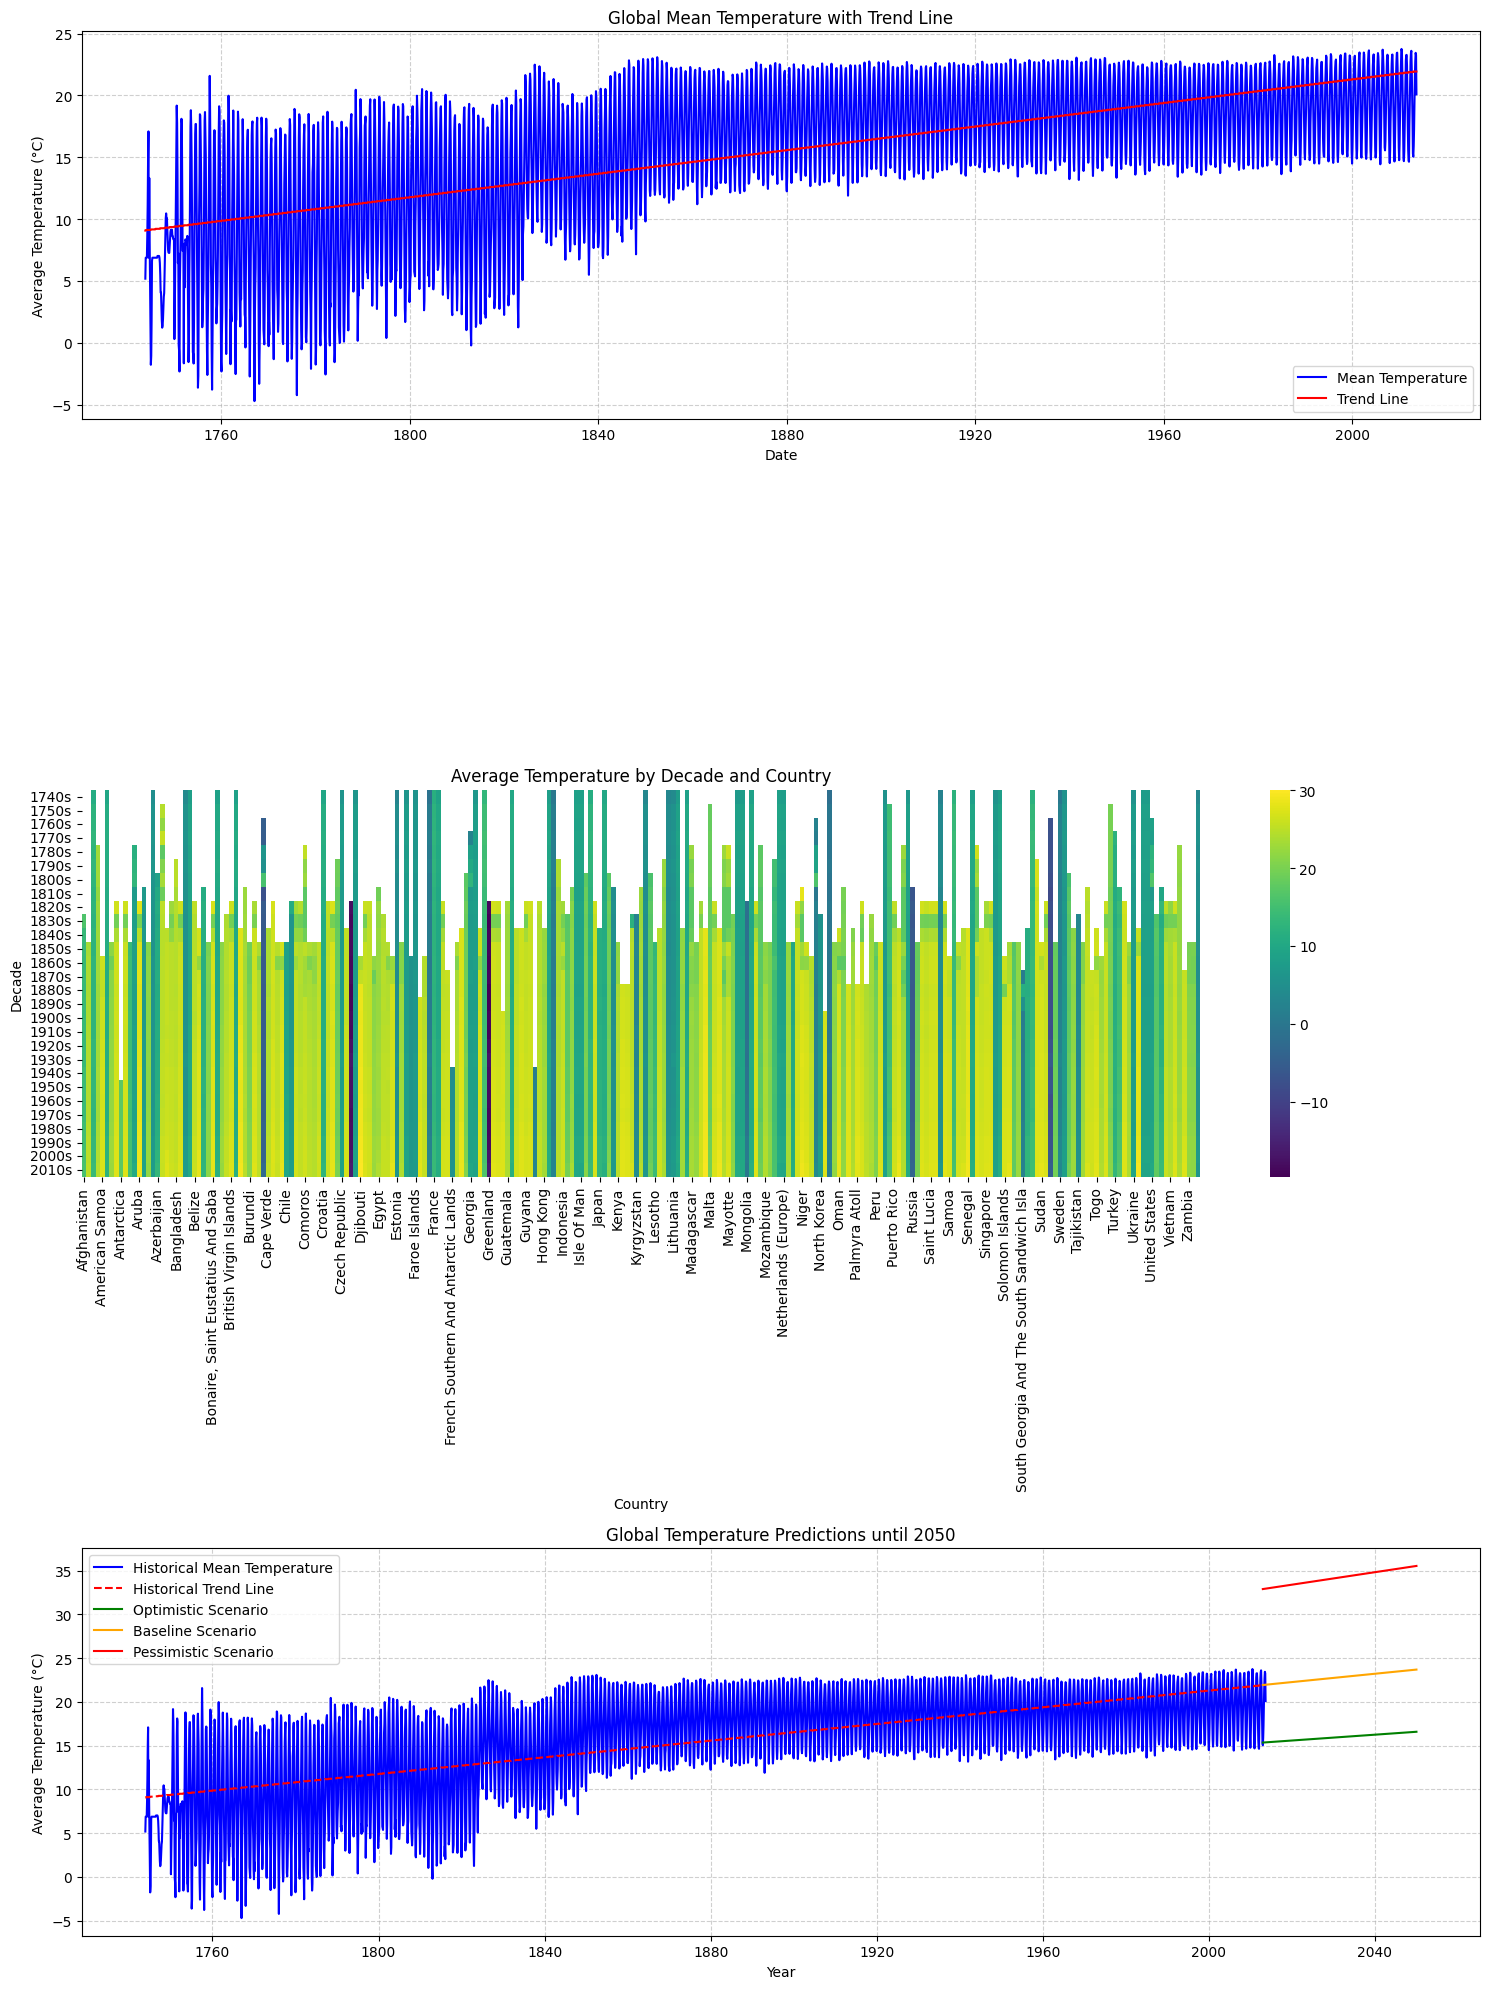

In [168]:
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

axes[0].plot(global_annual['dt'], global_annual['AverageTemperature'], label='Mean Temperature', color='blue')
axes[0].plot(global_annual['dt'], trend_line, label='Trend Line', color='red')
axes[0].set_title('Global Mean Temperature with Trend Line')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Average Temperature (°C)')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()


decade_country_temp = df_new.groupby(["Decade", "Country"])["AverageTemperature"].mean().reset_index()
heatmap_data = decade_country_temp.pivot(index="Decade", columns="Country", values="AverageTemperature")
sns.heatmap(heatmap_data, annot=False, cmap='viridis', fmt=".1f", ax=axes[1])
axes[1].set_title('Average Temperature by Decade and Country')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Decade')
axes[1].tick_params(axis='x', rotation=90)

future_years_dt = pd.to_datetime([f'{y}-01-01' for y in years_future])

axes[2].plot(global_annual['dt'], global_annual['AverageTemperature'], label='Historical Mean Temperature', color='blue')
axes[2].plot(global_annual['dt'], trend_line, label='Historical Trend Line', color='red', linestyle='--')
axes[2].plot(future_years_dt, optimistic_future_temps, label='Optimistic Scenario', color='green', linestyle='-')
axes[2].plot(future_years_dt, baseline_future_temps, label='Baseline Scenario', color='orange', linestyle='-')
axes[2].plot(future_years_dt, pessimistic_future_temps, label='Pessimistic Scenario', color='red', linestyle='-')
axes[2].set_title('Global Temperature Predictions until 2050')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Temperature (°C)')
axes[2].grid(True, linestyle='--', alpha=0.6)
axes[2].legend()

plt.tight_layout()
plt.show()